### FE670 - Assignment #2

**Author**: Sid Bhatia

**Date**: October 12th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Problem #1

Given $n$ securities with Expected Return Vector $\bm{\mu}$ and Covariance Matrix $\bm{\Sigma}$, the return of a portfolio with weights $\mathbf{w}$ is a random variable $R_p = \mathbf{w'R}$ with expected return and variance given by:

$$\mu_p = \mathbf{w'}\bm{\mu} \\ \sigma_p^2 = \mathbf{w'}\bm{\Sigma}\mathbf{w}$$

For now, we simply assume that expected returns, $\bm{\mu}$, and their covariance matrix $\bm{\Sigma}$, are given. To calculate the weights for one possible pair, we choose a targeted mean return, $\mu_0$.  Following Markowitz, the investor’s problem is constrained minimization problem:

$$\min_{w} \frac{1}{2} \mathbf{w'}\bm{\Sigma}\mathbf{w} \\ \text{s.t} \\ \mu_0 = \mathbf{w'}\bm{\mu}, \mathbf{w'1'} = 1, \mathbf{1'} = [1, 1, \cdots, 1]$$

We refer to this version of the classical mean-variance optimization problem as the *risk minimization formulation*, and this problem is a quadratic optimization problem with equality constraints with the solution given by:

$$w = \bm{\lambda}\bm{\Sigma^{-1}}\mathbf{1'} + \bm{\gamma\Sigma^{-1}\mu} \\ \text{where} \\ \bm{\lambda} = \frac{C - \mu_0B}{\Delta}, \bm{\gamma} = \frac{\mu_0A - B}{\Delta} \\ A = \bm{1'\Sigma^{-1}1}, B = \bm{1'\Sigma^{-1}\mu}, C = \bm{\mu'\Sigma^{-1}\mu} \\ \Delta = \mathbf{AC - B^2}$$

It is easy to see that:

$$\sigma_0^2 = \mathbf{w'}\bm{\Sigma^{-1}}\mathbf{w} \\ = \frac{A\mu_0^2 - 2B\mu_0 + C}{\Delta}$$

Now, we take $n = 2$ and denote the optimal solution by $w(\sigma_0^2)$, and assume that the expected $\bf{\mu} = \begin{pmatrix} 0.05 \\ 0.10 \end{pmatrix}$ and $\bf{\Sigma} = \begin{pmatrix} 0.01 & - 0.01 \\ -0.01 & 0.04 \end{pmatrix}$, please answer the following questions:

1. Please plot the efficient frontier of the portfolio, and calculate variance when $\bm{\mu_0} = 0.10$ and $\bm{\mu_0} = 0.20$ manually.

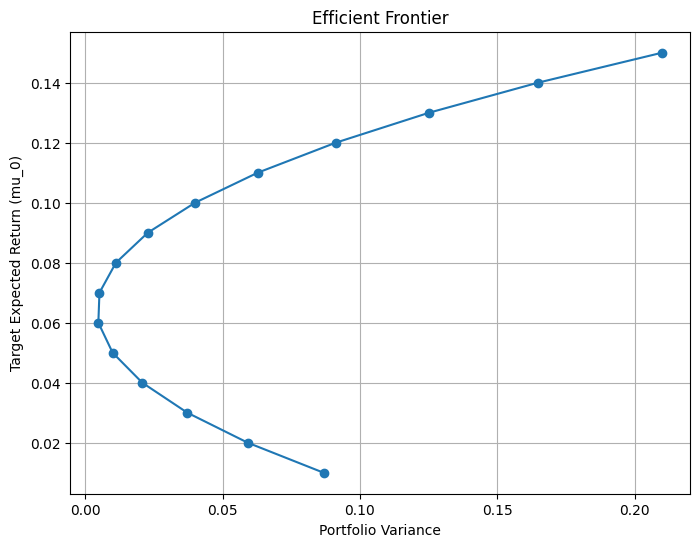

Portfolio Variance for mu_0 = 0.10: 0.04
Portfolio Variance for mu_0 = 0.20: 0.52


In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = np.array([0.05, 0.10])
covariance_matrix = np.array([[0.01, -0.01], [-0.01, 0.04]])

# Calculate inverse of covariance matrix.
sigma_inverse = np.linalg.inv(covariance_matrix)

# Create a range of target expected returns (mu_0).
mu_0_range = np.arange(0.01, 0.16, 0.01)

# Initialize arrays to store portfolio variances.
portfolio_variances = []


# Define respective solution variables.
ones = np.ones(2)
A = ones @ sigma_inverse @ ones
B = ones @ sigma_inverse @ mu
C = mu @ sigma_inverse @ mu
Delta = A * C - B**2

def calc_sigma_0_squared(A, B, C, Delta, mu_0):
    """
    Write a function to calculate sigma_0_squared based on A, B, C, Delta, and mu_0.
    """
    sigma_0_squared = (A * mu_0**2 - 2 * B * mu_0 + C) / Delta
    return sigma_0_squared

# Calculate portfolio variances for each mu_0.
for mu_0 in mu_0_range:
    portfolio_variances.append(calc_sigma_0_squared(A, B, C, Delta, mu_0))

# Plot the Efficient Frontier.
plt.figure(figsize=(8, 6))
plt.plot(portfolio_variances, mu_0_range, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Variance')
plt.ylabel('Target Expected Return (mu_0)')
plt.grid(True)
plt.show()

# Calculate portfolio variance for mu_0 = 0.10 and mu_0 = 0.20.
mu_0_1 = 0.10
mu_0_2 = 0.20

sigma_0_1_squared = calc_sigma_0_squared(A, B, C, Delta, mu_0_1)
sigma_0_2_squared = calc_sigma_0_squared(A, B, C, Delta, mu_0_2)

print(f'Portfolio Variance for mu_0 = 0.10: {sigma_0_1_squared:.2f}')
print(f'Portfolio Variance for mu_0 = 0.20: {sigma_0_2_squared:.2f}')

2. If we introduce a risk free rate $R_f = 0.02$, please find the **market portfolio** of these two stock portfolio, and calculate the slope of the **Capital Market Line (CML)** along with the portfolio frontier.

In this case, the portfolio's expected return and variance are:

$$\mu_p = \mathbf{w'_R}\bm{\mu} + (1 - \mathbf{w'_R}I)R_f \\ \sigma_p^2 = \mathbf{w'_R}\Sigma{w_R}$$

since the risk-free asset has zero variance and is uncorrelated with the risky assets.

As such, the investor's objective is again for a targeted level of expected portfolio return, $\mu_0$, to choose allocations by solving a quadratic optimization problem:

$$\min_{w_R}\mathbf{w'_R}\Sigma\mathbf{w_R} \\ \text{subject to} \\ \mu_0 = \mathbf{w'_R}\bm{\mu} + (1 - \mathbf{w'_R}I)R_f$$

The optimal portfolio weights are given by:

$$\mathbf{w_R} = C\bm{\Sigma^{-1}}(\bm{\mu} - R_f \mathbf{I}) \\ \text{where} \\ C = \frac{\mu_0 - R_f}{(\bm{\mu} - R_f \mathbf{I})'\Sigma^{-1}(\bm{\mu} - R_f \mathbf{I})}$$   

Therefore, with a risk-free asset, all minimum variance portfolios are a combination of the risk-free asset and a given risky portfolio. The risky portfolio is often called tangency portfolio or market portfolio.

In [2]:
R_f = 0.02

# Calculate the difference between risky asset returns and the risk-free rate.
mu_diff = mu - R_f

# Define target return mu_0 to be 0.10.
mu_0 = 0.10

# Initialize arrays to store portfolio statistics.
portfolio_returns = []
portfolio_volatility = []

for mu_0 in mu_0_range:
    # Calculate the scalar C based on the desired target return (mu_0).
    C = (mu_0 - R_f) / (mu_diff @ sigma_inverse @ mu_diff)
    
    # Calculate optimal portfolio weights for the risky assets.
    w_R = C * sigma_inverse @ mu_diff

    # Calculate the expected return of the market portfolio.
    mu_m = w_R @ mu + (1 - w_R @ ones) * R_f

    # Calculate the volatility (risk) of the portfolio.
    portfolio_volatility = w_R @ covariance_matrix @ w_R
    
    portfolio_returns.append(mu_m)
    portfolio_volatility.append(portfolio_volatility)


# Calculate the slope of the Capital Market Line (CML).
S = (mu_m - R_f) / sigma_m

print(f"Market Portfolio Weights for Risky Assets (w_R): {w_R}")
print(f"Expected Return of the Market Portfolio (mu_m): {mu_m:.2f}")
print(f"Standard Deviation of the Market Portfolio (sigma_m): {sigma_m:.3f}")
print(f"Slope of the CML (S): {S:.3f}")

AttributeError: 'numpy.float64' object has no attribute 'append'

#### Problem #2

Suppose that are $N = 3$ assets $s_1$, $s_2$, and $s_3$ respectively. The covariance matrix and expected rates of return are:

$$\bm{\Sigma} = \begin{bmatrix}
3.0 & 1.5 & 0.0 \\
1.5 & 3.0 & 1.5 \\
0.0 & 1.5 & 3.0
\end{bmatrix} \text{and} \; \bm{\mu} = \begin{bmatrix}
0.5 \\
0.3 \\
0.7
\end{bmatrix}$$

One of the basic assumptions underlying the Black-Litterman model is that the expected return of a security should be consistent with market equilibrium unless the investor has a specific view on the security, and the market equilibrium can be expressed as:

$$\bm{\Pi} = \bm{\mu} + \bm{\epsilon_{\Pi}}, \bm{\epsilon_{\Pi}} \sim \mathcal{N}(0, \tau\bm{\Sigma})$$

for some parameter $\tau << 1$. We can think about $\tau\bm{\Sigma}$ as our confidence in how well we can estimate the equilibrium expected returns.

Formally, $K$ views in Black-Litterman model are expressed as a vector $\mathbf{q}$ with:

$$\mathbf{q} = \mathbf{P}\bm{\mu} + \bm{\epsilon_q}, \bm{\epsilon_q} \sim \mathcal{N}(0, \bm{\Omega})$$

where $\mathbf{P}$ is a $K \times K$ matrix (explained in the following example) and $\bm{\Omega}$ is a $K \times K$ matrix expressing the confidence in the views.

Let us assume that the asset universe that we consider the three stocks and that an investor has the following two views ($K = 2$): (1) $s_1$ will have a return of $2.0\%$. (2) $s_3$ will outperform $s_2$ by $4.0\%$. Mathematically, we express the two views together as:

$$\begin{bmatrix} 2.0\% \\ 4.0\% \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & 1 \end{bmatrix} 

\begin{bmatrix} \mu_1 \\ \mu_2 \\ \mu_3 \end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \end{bmatrix}$$

We also assume a higher confidence in the views, and conversely we have:

$$\bm{\Omega} = \begin{bmatrix} 5\%^2 & 0 \\ 0 & 6\%^2 \end{bmatrix}$$

According to Black-Litterman, we will have:

$$\bm{\hat{\mu}}_{BL} = [(\tau\Sigma)^{-1} + \mathbf{P'}\Omega^{-1}\mathbf{P}]^{-1} [(\tau\Sigma)^{-1}\bm{\Pi} + \mathbf{P'}\Omega^{-1}\mathbf{q}]$$

where $\bm{\Pi}$ is the equilibrium risk premium over the risk free rate (3 x 1 vector) which can be calculated as $\bm{\mu}$ over the risk free rate of $r_f = 0.02$. Please answer the following questions using the data provided:

1. Find the minimum variance portfolio - MVP.

2. If the risk free rate is $r_f$ , find an efficient portfolio risky assets, and plot the efficient portfolio frontier.

3. Assume we have $\tau = 0.03$, please calculate the expected return conditional on the views $\bm{\hat{\mu}}_{BL}$.

4. Based on $\bm{\hat{\mu}}_{BL}$ and recalculate the minimum variance portfolio. Please provide comments on the differences between the original MVP and the adjusted MVP.